# Script contents:
1. Importing libraries and dataframe
2. Basic plotting with pandas
3. Functional approach
4. Object-oriented approach

### 1. Importing libraries and dataframe

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [3]:
# Load only required columns since the data is very large
df = pd.read_csv('NY_citibikes_data.csv', usecols=["date", "avgTemp", "ride_id"])

In [4]:
df.head()

ride_id        date  avgTemp
0  BFD29218AB271154  2022-01-21     -6.0
1  7C953F2FD7BE1302  2022-01-10      1.6
2  95893ABD40CED4B8  2022-01-26     -2.3
3  F853B50772137378  2022-01-03      1.4
4  7590ADF834797B4B  2022-01-22     -5.9

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29838806 entries, 0 to 29838805
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   ride_id  object 
 1   date     object 
 2   avgTemp  float64
dtypes: float64(1), object(2)
memory usage: 683.0+ MB


In [6]:
df.shape

(29838806, 3)

In [7]:
df.dtypes

ride_id     object
date        object
avgTemp    float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

### 2. Basic plotting with Pandas

In [9]:
df_temp = df.set_index('date')

<Axes: xlabel='date'>

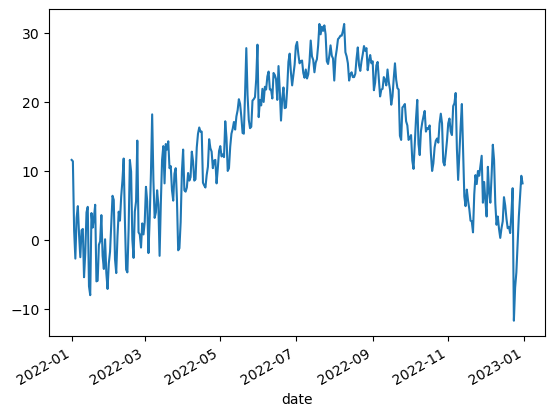

In [10]:
df_temp.groupby("date")["avgTemp"].mean().plot()

### The dataset was too big to plot all the avgtemp points, hence they are grouped togther.

### 3. Procedural/Functional approach

In [11]:
df_temp['avgTemp'][::100].plot()
plt.show()


In [30]:
# Resample to weekly average
df_temp_weekly = df_temp['avgTemp'].resample('W').mean()  
plt.figure(figsize=(12,5))
plt.plot(df_temp_weekly, color='red', linewidth=1.5)
plt.title('Weekly Average Temperatures for 2022')
plt.xlabel('Week')
plt.ylabel('Temperature (Â°C)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Visualizations/weekly_avg_temp_2022.png", dpi=300, bbox_inches='tight')
plt.show()

### Again, the data is huge, so daily average temperature is very hard to plot. The command ended up with overflow error. Hence the daily average temperature are rescaled to weekly average

### 4. Aggregating count of trips

In [13]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [14]:
df_group.head()

date  ride_id
0 2021-01-30        1
1 2021-02-15        1
2 2021-03-11        1
3 2021-03-14        1
4 2021-03-31        1

In [15]:
df_group.tail()

date  ride_id
397 2022-12-27    33044
398 2022-12-28    44027
399 2022-12-29    51674
400 2022-12-30    62298
401 2022-12-31    31466

#### There are few dates from 2021 in the dataset and the dates are also not arranged accordingly. 

In [16]:
## Filter out the dates from 2022
df_group = df_group[df_group['date'].dt.year == 2022] \
                    .sort_values('date') \
                    .reset_index(drop=True)


In [17]:
df_group.head()

date  ride_id
0 2022-01-01    20428
1 2022-01-02    43009
2 2022-01-03    33189
3 2022-01-04    36842
4 2022-01-05    34230

### Similarily, filter out dates from the main df dataframe only for 2022.

In [18]:
## Filter out the dates only for the year 2022. 
df = df[df['date'].dt.year == 2022]

In [20]:
# Sort dates in chronological order
df = df.sort_values('date').reset_index(drop=True)

In [21]:
df.head()

ride_id       date  avgTemp
0  FB33E3D8F21E2941 2022-01-01     11.6
1  755337295F178067 2022-01-01     11.6
2  C62CA87E3A475ADD 2022-01-01     11.6
3  CD7A2098AFCD5514 2022-01-01     11.6
4  3F9E0C51F49F78A3 2022-01-01     11.6

In [22]:
##merging the dataframes

df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          29838166
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 5)
Shape of January 2nd is (43009, 5)
Index(['ride_id', 'avgTemp', 'bike_rides_daily', '_merge'], dtype='object')


In [23]:
df_temp.head()

ride_id  avgTemp  bike_rides_daily _merge
date                                                          
2022-01-01  FB33E3D8F21E2941     11.6             20428   both
2022-01-01  755337295F178067     11.6             20428   both
2022-01-01  C62CA87E3A475ADD     11.6             20428   both
2022-01-01  CD7A2098AFCD5514     11.6             20428   both
2022-01-01  3F9E0C51F49F78A3     11.6             20428   both

In [24]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

### 4. Object-oriented approach

In [26]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")
ax.plot(df_temp['avgTemp'], color = 'blue')

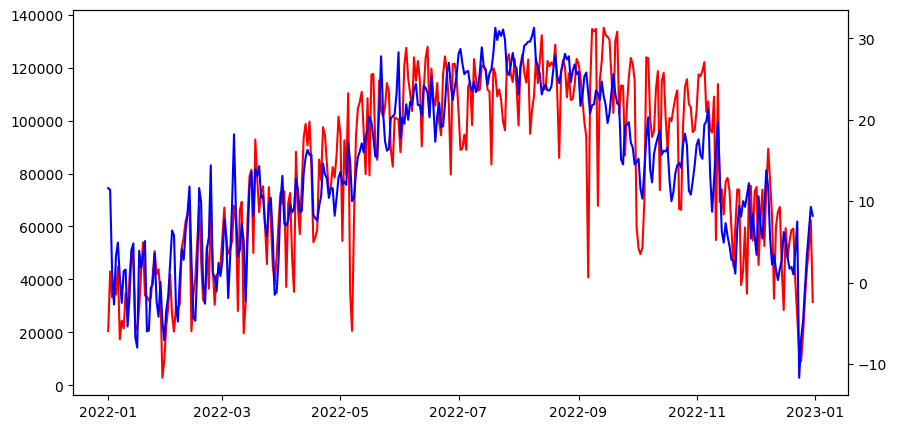

In [27]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

#### To create a dual axis graph, two objects ax and ax2 are created. ax2 is created on top of ax, using the twinaxis function of matplotlib. This function means that the two plots will be placed in the same axis with their own scales and legends. 
#### The graph represents that Jan and Dec are the coldest months and the number of bike rides are decreasing as the temperature drops, and vice versa. 

In [28]:
### Final graph
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [31]:
# save the plot as a file
fig.savefig('Visualizations/trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [34]:
plt.style.use('ggplot')

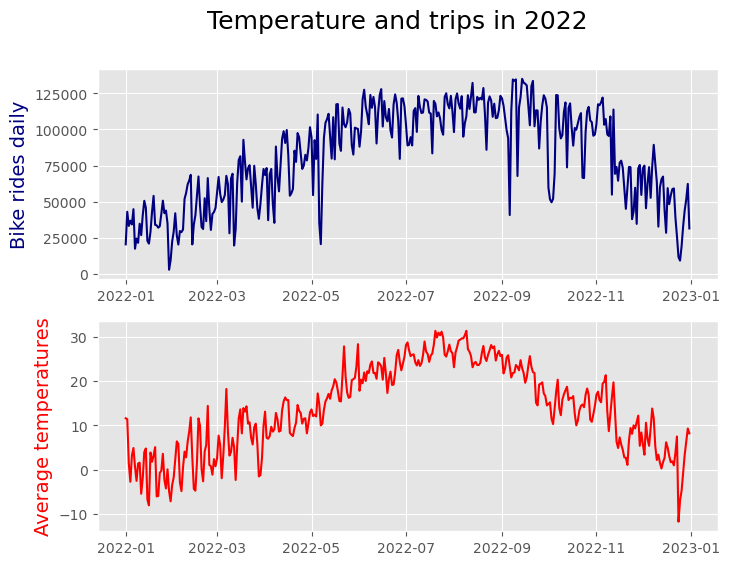

In [35]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)
plt.savefig("Visualizations/Temperature and trips in 2022.png", dpi=300, bbox_inches='tight')
plt.show()